In [4]:
import csv
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from ecgdetectors import Detectors
import os
from wettbewerb import load_references

## Data Preparation

The final dataframe used in the models training was saved in the std_files folder to avoid having to run it multiple times.

Following is the way we obtained said dataframes:

In [5]:
# Importiere EKG-Dateien, zugehörige Diagnose, Sampling-Frequenz (Hz) und Name

ecg_leads,ecg_labels,fs,ecg_names = load_references('./training')    # Wenn der Ordner mit der Database Training von moodle in einem anderen Ordner liegt, fügen Sie hier den korrigierten Pfad ein 

# Daten normalization

for idx, ecg_lead in enumerate(ecg_leads):
    if len(ecg_lead) != 18000:
        m = 18000 // len(ecg_lead)
        new_ecg_lead = ecg_lead
        for i in range(0, m-1):
            new_ecg_lead = np.append(new_ecg_lead, ecg_lead)
        r = 18000 - len(new_ecg_lead)
        new_ecg_lead = np.append(new_ecg_lead, ecg_lead[:r])
        ecg_leads[idx] = new_ecg_lead

detectors = Detectors(fs)                                     # Initialisierung des QRS-Detektors

                                                              # Initialisierung der Feature-Arrays für Hamilton Detector
sdnn_normal_ham = np.array([])                                # Initialisierung der Normal Feature-Arrays
sdnn_afib_ham = np.array([])                                  # Initialisierung der Vorhofflimmern Feature-Arrays
sdnn_ryth_ham = np.array([])                                  # Initialisierung der anderer Rhythmus Feature-Arrays
sdnn_unbr_ham = np.array([])                                  # Initialisierung der unbrauchbar Feature-Arrays

                                                              # Initialisierung der Feature-Arrays für Christov Detector
sdnn_normal_chr = np.array([])                                # Initialisierung der Normal Feature-Arrays
sdnn_afib_chr = np.array([])                                  # Initialisierung der Vorhofflimmern Feature-Arrays
sdnn_ryth_chr = np.array([])                                  # Initialisierung der anderer Rhythmus Feature-Arrays
sdnn_unbr_chr = np.array([])                                  # Initialisierung der unbrauchbar Feature-Arrays

                                                              # Initialisierung der Feature-Arrays für Stationary Wavelet Transform Detector Detector
sdnn_normal_swt = np.array([])                                # Initialisierung der Normal Feature-Arrays
sdnn_afib_swt = np.array([])                                  # Initialisierung der Vorhofflimmern Feature-Arrays
sdnn_ryth_swt = np.array([])                                  # Initialisierung der anderer Rhythmus Feature-Arrays
sdnn_unbr_swt = np.array([])                                  # Initialisierung der unbrauchbar Feature-Arrays



6000	 Dateien wurden geladen.


In [6]:
for idx, ecg_lead in enumerate(ecg_leads):
    r_peaks_ham = detectors.hamilton_detector(ecg_lead)     # Detektion der QRS-Komplexe mit Hamilton Detector
    r_peaks_chr = detectors.christov_detector(ecg_lead)       # Detektion der QRS-Komplexe mit Christov Detector
    r_peaks_swt = detectors.swt_detector(ecg_lead)          # Detektion der QRS-Komplexe mit Stationary Wavelet Transform Detector

    sdnn_ham = np.std(np.diff(r_peaks_ham)/fs*1000)             # Berechnung der Standardabweichung der Schlag-zu-Schlag Intervalle (SDNN) in Millisekunden - Hamilton
    sdnn_chr = np.std(np.diff(r_peaks_chr)/fs*1000)             # Berechnung der Standardabweichung der Schlag-zu-Schlag Intervalle (SDNN) in Millisekunden - Christov
    sdnn_swt = np.std(np.diff(r_peaks_swt)/fs*1000)             # Berechnung der Standardabweichung der Schlag-zu-Schlag Intervalle (SDNN) in Millisekunden - Stationary Wavelet Transform

    if ecg_labels[idx] == 'N':
        sdnn_normal_ham = np.append(sdnn_normal_ham, sdnn_ham)         # Zuordnung zu "Normal"
        sdnn_normal_chr = np.append(sdnn_normal_chr, sdnn_chr)
        sdnn_normal_swt = np.append(sdnn_normal_swt, sdnn_swt)
    if ecg_labels[idx] == 'A':
        sdnn_afib_ham = np.append(sdnn_afib_ham, sdnn_ham)             # Zuordnung zu "Vorhofflimmern"
        sdnn_afib_chr = np.append(sdnn_afib_chr, sdnn_chr) 
        sdnn_afib_swt = np.append(sdnn_afib_swt, sdnn_swt) 
    if ecg_labels[idx] == 'O':
        sdnn_ryth_ham = np.append(sdnn_ryth_ham, sdnn_ham)             # Zuordnung zu "anderer Rhythmus"
        sdnn_ryth_chr = np.append(sdnn_ryth_chr, sdnn_chr) 
        sdnn_ryth_swt = np.append(sdnn_ryth_swt, sdnn_swt) 
    if ecg_labels[idx] == '~':
        sdnn_unbr_ham = np.append(sdnn_unbr_ham, sdnn_ham)             # Zuordnung zu "unbrauchbar"
        sdnn_unbr_chr = np.append(sdnn_unbr_chr, sdnn_chr) 
        sdnn_unbr_swt = np.append(sdnn_unbr_swt, sdnn_swt) 
    if (idx % 100) == 0:
        print(str(idx) + "\t EKG Signale wurden verarbeitet.")

0	 EKG Signale wurden verarbeitet.
100	 EKG Signale wurden verarbeitet.
200	 EKG Signale wurden verarbeitet.
300	 EKG Signale wurden verarbeitet.
400	 EKG Signale wurden verarbeitet.
500	 EKG Signale wurden verarbeitet.
600	 EKG Signale wurden verarbeitet.
700	 EKG Signale wurden verarbeitet.
800	 EKG Signale wurden verarbeitet.
900	 EKG Signale wurden verarbeitet.
1000	 EKG Signale wurden verarbeitet.
1100	 EKG Signale wurden verarbeitet.
1200	 EKG Signale wurden verarbeitet.
1300	 EKG Signale wurden verarbeitet.
1400	 EKG Signale wurden verarbeitet.
1500	 EKG Signale wurden verarbeitet.
1600	 EKG Signale wurden verarbeitet.
1700	 EKG Signale wurden verarbeitet.
1800	 EKG Signale wurden verarbeitet.
1900	 EKG Signale wurden verarbeitet.
2000	 EKG Signale wurden verarbeitet.
2100	 EKG Signale wurden verarbeitet.
2200	 EKG Signale wurden verarbeitet.
2300	 EKG Signale wurden verarbeitet.
2400	 EKG Signale wurden verarbeitet.
2500	 EKG Signale wurden verarbeitet.
2600	 EKG Signale wurden

In this next cell we plot the data for three detector avaible in the ecgdetectors. Upon seeing these  responses it was expected that the SWT detector would yield a better result for the training as there  is a  greater distinction between each condition than with other detectors.

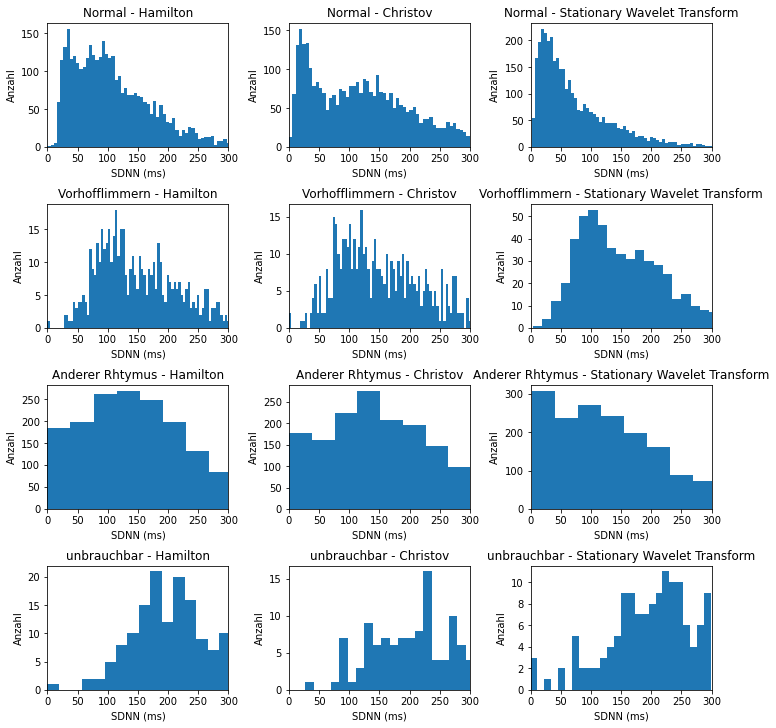

In [12]:
fig, axs = plt.subplots(4,3, constrained_layout=True, figsize=(10, 10))
axs[0][0].hist(sdnn_normal_ham,2000)
axs[0][0].set_xlim([0, 300])
axs[0][0].set_title("Normal - Hamilton")
axs[0][0].set_xlabel("SDNN (ms)")
axs[0][0].set_ylabel("Anzahl")
axs[1][0].hist(sdnn_afib_ham,300)
axs[1][0].set_xlim([0, 300])
axs[1][0].set_title("Vorhofflimmern - Hamilton")
axs[1][0].set_xlabel("SDNN (ms)")
axs[1][0].set_ylabel("Anzahl")
axs[2][0].hist(sdnn_ryth_ham,300)
axs[2][0].set_xlim([0, 300])
axs[2][0].set_title("Anderer Rhtymus - Hamilton")
axs[2][0].set_xlabel("SDNN (ms)")
axs[2][0].set_ylabel("Anzahl")
axs[3][0].hist(sdnn_unbr_ham,300)
axs[3][0].set_xlim([0, 300])
axs[3][0].set_title("unbrauchbar - Hamilton")
axs[3][0].set_xlabel("SDNN (ms)")
axs[3][0].set_ylabel("Anzahl")

axs[0][1].hist(sdnn_normal_chr,2000)
axs[0][1].set_xlim([0, 300])
axs[0][1].set_title("Normal - Christov")
axs[0][1].set_xlabel("SDNN (ms)")
axs[0][1].set_ylabel("Anzahl")
axs[1][1].hist(sdnn_afib_chr,300)
axs[1][1].set_xlim([0, 300])
axs[1][1].set_title("Vorhofflimmern - Christov")
axs[1][1].set_xlabel("SDNN (ms)")
axs[1][1].set_ylabel("Anzahl")
axs[2][1].hist(sdnn_ryth_chr,300)
axs[2][1].set_xlim([0, 300])
axs[2][1].set_title("Anderer Rhtymus - Christov")
axs[2][1].set_xlabel("SDNN (ms)")
axs[2][1].set_ylabel("Anzahl")
axs[3][1].hist(sdnn_unbr_chr,300)
axs[3][1].set_xlim([0, 300])
axs[3][1].set_title("unbrauchbar - Christov")
axs[3][1].set_xlabel("SDNN (ms)")
axs[3][1].set_ylabel("Anzahl")

axs[0][2].hist(sdnn_normal_swt,2000)
axs[0][2].set_xlim([0, 300])
axs[0][2].set_title("Normal - Stationary Wavelet Transform")
axs[0][2].set_xlabel("SDNN (ms)")
axs[0][2].set_ylabel("Anzahl")
axs[1][2].hist(sdnn_afib_swt,300)
axs[1][2].set_xlim([0, 300])
axs[1][2].set_title("Vorhofflimmern - Stationary Wavelet Transform")
axs[1][2].set_xlabel("SDNN (ms)")
axs[1][2].set_ylabel("Anzahl")
axs[2][2].hist(sdnn_ryth_swt,300)
axs[2][2].set_xlim([0, 300])
axs[2][2].set_title("Anderer Rhtymus - Stationary Wavelet Transform")
axs[2][2].set_xlabel("SDNN (ms)")
axs[2][2].set_ylabel("Anzahl")
axs[3][2].hist(sdnn_unbr_swt,300)
axs[3][2].set_xlim([0, 300])
axs[3][2].set_title("unbrauchbar - Stationary Wavelet Transform")
axs[3][2].set_xlabel("SDNN (ms)")
axs[3][2].set_ylabel("Anzahl")

plt.show()